# Derin Öğrenme İçin Aktivasyon Fonksiyonlarının Karşılaştırılması


---


Bunun için MNIST veri seti için basit bir Evrişimli Sİnir ağı modeli tercih edilmiştir. 


*   Sigmoid Fonksiyonu
*   Hiperbolik Tanjant
*   ReLU Fonksiyonu
*   Leaky-ReLU Fonksiyonu
*   Swish Fonksiyonu

Aktivasyon fonksiyonlarının aynı veri seti ve derin öğrenme modeli için elde ettikleri doğrulama başarısı ve yitimi, eğitim başarısı ve yitimi hesaplanmaktadır. Histogramlar ile karşılaştırılması sunulmaktadır.


---


### Detaylar için lütfen blog yazısını inceleyiniz!

### Anlatım için videoyu takip edebilirsiniz!


---






### Google Colab Kimlik Doğrulama İşlemi

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


### Kullanılan donanımın bilgilerini görmek için bu kısmı çalıştırabilirsiniz!
Biz bu çalışmayı GPU (Tesla K80) üzerinde yapacağız.

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6439294314046186676, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 7330259368207107711
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 6873113079074382310
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11281553818
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 4615915592190268237
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

### Kütüphanelerin kurulması ve gerekli importların yapılması adımı

In [0]:
!pip install -q keras

In [4]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras. layers import Conv2D, MaxPooling2D
from keras import backend as K

import tensorflow  as tf
from keras.layers import *
from keras.callbacks import ReduceLROnPlateau

import matplotlib.pyplot as plt

Using TensorFlow backend.


## Veri Setinin İndirilmesi

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


### Verilerden bir kısım örneğin görselleştirilmesi
Bu adımı yapmak zorunda değiliz. Yeniden boyutlandırma veriden bir kısmının ekrana yazdırılması hakkında fikir sehibi olmuş oluyoruz.

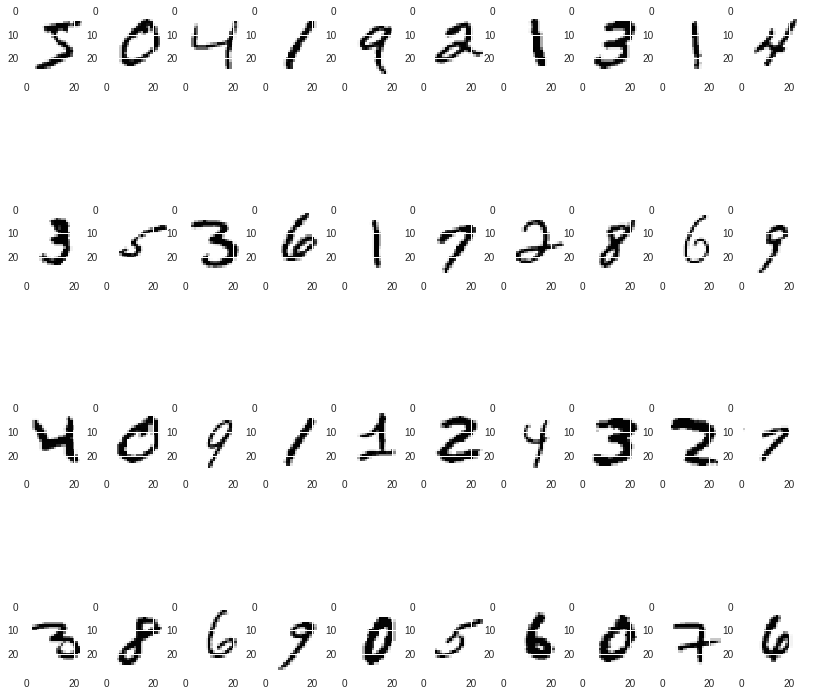

In [6]:
plt.figure(figsize=(14,14))
x, y = 10, 4 
for i in range(40):  
    plt.subplot(y, x, i+1)
    plt.imshow(x_train[i])
plt.show()

### Yapılandırma Ayarları

In [0]:
batch_size = 128 # Küme Boyutu
num_classes = 10 # Sınıf Sayısı
epochs = 20 # Eğitimin epoch sayısı
w_l2 = 1e-5 # Başlangıç

In [0]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5)

In [9]:
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# sınıf vektörlerini ikili sınıf matrislerine dönüştürmek
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Sigmoid Fonksiyonu 

In [10]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
__________

### Modelin Eğitilm ve Test Sonuçları 


In [11]:
hist_sigmoid=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 16s 261us/step - loss: 0.5521 - acc: 0.8632 - val_loss: 0.1937 - val_acc: 0.9608
Epoch 2/20
60000/60000 [==============================] - 12s 199us/step - loss: 0.1990 - acc: 0.9503 - val_loss: 0.0835 - val_acc: 0.9811
Epoch 3/20
60000/60000 [==============================] - 12s 199us/step - loss: 0.1437 - acc: 0.9628 - val_loss: 0.0991 - val_acc: 0.9768
Epoch 4/20
60000/60000 [==============================] - 12s 200us/step - loss: 0.1226 - acc: 0.9678 - val_loss: 0.0971 - val_acc: 0.9741
Epoch 5/20
60000/60000 [==============================] - 12s 200us/step - loss: 0.1059 - acc: 0.9737 - val_loss: 0.0737 - val_acc: 0.9817
Epoch 6/20
60000/60000 [==============================] - 12s 201us/step - loss: 0.0981 - acc: 0.9753 - val_loss: 0.0588 - val_acc: 0.9869
Epoch 7/20
60000/60000 [==============================] - 13s 209us/step - loss: 0.0936 - acc: 0.9773 - val_loss: 0.

### Hiperbolik Tanjant Fonksiyonu

In [12]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('tanh'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_4 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_5 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
activation_5 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
__________

### Modelin Eğitilm ve Test Sonuçları 

In [13]:
hist_tanh=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 216us/step - loss: 0.1885 - acc: 0.9446 - val_loss: 0.0762 - val_acc: 0.9778
Epoch 2/20
60000/60000 [==============================] - 12s 197us/step - loss: 0.0808 - acc: 0.9780 - val_loss: 0.0613 - val_acc: 0.9826
Epoch 3/20
60000/60000 [==============================] - 12s 198us/step - loss: 0.0692 - acc: 0.9810 - val_loss: 0.0548 - val_acc: 0.9845
Epoch 4/20
60000/60000 [==============================] - 12s 202us/step - loss: 0.0583 - acc: 0.9846 - val_loss: 0.0737 - val_acc: 0.9803
Epoch 5/20
60000/60000 [==============================] - 12s 198us/step - loss: 0.0562 - acc: 0.9852 - val_loss: 0.0489 - val_acc: 0.9873
Epoch 6/20
60000/60000 [==============================] - 12s 197us/step - loss: 0.0548 - acc: 0.9863 - val_loss: 0.0579 - val_acc: 0.9855
Epoch 7/20
60000/60000 [==============================] - 12s 198us/step - loss: 0.0520 - acc: 0.9871 - val_loss: 0.

### ReLU Fonksiyonu

In [14]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_7 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
activation_7 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_8 (Batch (None, 24, 24, 64)        256       
_________________________________________________________________
activation_8 (Activation)    (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
__________

### Modelin Eğitilm ve Test Sonuçları 


In [15]:
hist_relu=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 13s 220us/step - loss: 0.1775 - acc: 0.9519 - val_loss: 0.0498 - val_acc: 0.9853
Epoch 2/20
60000/60000 [==============================] - 12s 199us/step - loss: 0.0818 - acc: 0.9784 - val_loss: 0.0405 - val_acc: 0.9884
Epoch 3/20
60000/60000 [==============================] - 12s 199us/step - loss: 0.0631 - acc: 0.9833 - val_loss: 0.0419 - val_acc: 0.9885
Epoch 4/20
60000/60000 [==============================] - 12s 198us/step - loss: 0.0562 - acc: 0.9856 - val_loss: 0.0425 - val_acc: 0.9894
Epoch 5/20
60000/60000 [==============================] - 12s 198us/step - loss: 0.0511 - acc: 0.9879 - val_loss: 0.0396 - val_acc: 0.9892
Epoch 6/20
60000/60000 [==============================] - 12s 198us/step - loss: 0.0479 - acc: 0.9888 - val_loss: 0.0406 - val_acc: 0.9910
Epoch 7/20
60000/60000 [==============================] - 12s 198us/step - loss: 0.0473 - acc: 0.9896 - val_loss: 0.

### Leaky (Sızıntı) ReLU Fonksiyonu
Bu fonksiyon keras içinde [advanced activation function](https://keras.io/layers/advanced-activations/) olarak tanımlıdır bu yüzen bu fonksiyonu import edip model içinde kullanmamız gerekir.

In [0]:
from keras.layers.advanced_activations import LeakyReLU

In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),  kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha=.001))
model.add(Conv2D(64, (3, 3),  kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Dense(64, activation='linear'))
model.add(LeakyReLU(alpha=.001))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2)))
model.add(BatchNormalization())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=.001))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_10 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_11 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
dense_7 (Dense)              (None, 24, 24, 64)        4160      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 24, 24, 64)        0         
__________

### Modelin Eğitilm ve Test Sonuçları 


In [18]:
hist_LeakyReLU=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 18s 301us/step - loss: 0.1817 - acc: 0.9470 - val_loss: 0.0684 - val_acc: 0.9797
Epoch 2/20
60000/60000 [==============================] - 16s 275us/step - loss: 0.0808 - acc: 0.9776 - val_loss: 0.0454 - val_acc: 0.9868
Epoch 3/20
60000/60000 [==============================] - 16s 274us/step - loss: 0.0642 - acc: 0.9826 - val_loss: 0.0458 - val_acc: 0.9873
Epoch 4/20
60000/60000 [==============================] - 16s 274us/step - loss: 0.0612 - acc: 0.9838 - val_loss: 0.0549 - val_acc: 0.9846
Epoch 5/20
60000/60000 [==============================] - 17s 279us/step - loss: 0.0534 - acc: 0.9863 - val_loss: 0.0387 - val_acc: 0.9900
Epoch 6/20
60000/60000 [==============================] - 16s 273us/step - loss: 0.0473 - acc: 0.9884 - val_loss: 0.0446 - val_acc: 0.9884
Epoch 7/20
60000/60000 [==============================] - 17s 277us/step - loss: 0.0482 - acc: 0.9889 - val_loss: 0.

### Swish Aktivasyon Fonksiyonunun Tanımlanması

In [0]:
def swish(x):
    return x * K.sigmoid(x)
    # return x * (1/(1 + K.exp(-x)))

In [20]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), kernel_regularizer=regularizers.l2(w_l2),
                 input_shape=input_shape, kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation(swish))
model.add(Conv2D(64, (3, 3), kernel_regularizer=regularizers.l2(w_l2), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation(swish))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, kernel_regularizer=regularizers.l2(w_l2), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Activation(swish))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_13 (Batc (None, 26, 26, 32)        128       
_________________________________________________________________
activation_10 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_14 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
activation_11 (Activation)   (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 64)        0         
__________

### Modelin Eğitilm ve Test Sonuçları 
Histogram tanımlaması

In [21]:
hist_swish=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test), callbacks=[reduce_lr])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 252us/step - loss: 0.1599 - acc: 0.9575 - val_loss: 0.0491 - val_acc: 0.9860
Epoch 2/20
60000/60000 [==============================] - 13s 223us/step - loss: 0.0698 - acc: 0.9817 - val_loss: 0.0554 - val_acc: 0.9850
Epoch 3/20
60000/60000 [==============================] - 13s 223us/step - loss: 0.0552 - acc: 0.9859 - val_loss: 0.0438 - val_acc: 0.9883
Epoch 4/20
60000/60000 [==============================] - 13s 222us/step - loss: 0.0483 - acc: 0.9881 - val_loss: 0.0413 - val_acc: 0.9902
Epoch 5/20
60000/60000 [==============================] - 13s 223us/step - loss: 0.0451 - acc: 0.9899 - val_loss: 0.0503 - val_acc: 0.9885
Epoch 6/20
60000/60000 [==============================] - 13s 222us/step - loss: 0.0414 - acc: 0.9914 - val_loss: 0.0443 - val_acc: 0.9900
Epoch 7/20
60000/60000 [==============================] - 13s 222us/step - loss: 0.0387 - acc: 0.9926 - val_loss: 0.

## Kaydedilen sonuçların çizilmesi için plot fonksiyonunun tanımlanması

In [0]:
def plot_history(hists, attribute='val_loss', axis=(-1,21,0.85,0.94), loc='lower right'):
    ylabel = {'oss': 'loss', 'acc': 'accuracy'}
    title = {'val_loss': 'valid. loss', 'loss': 'trn. loss', 'val_acc': 'valid. accuracy', 'acc': 'trn. accuracy'}
    num_hists = len(hists)
    
    plt.figure(figsize=(12, 8))  
    plt.axis(axis)
    for i in range(num_hists):
        plt.plot(hists[i].history[attribute])
    plt.title(title[attribute])  
    plt.ylabel(ylabel[attribute[-3:]])  
    plt.xlabel('epoch')  
    plt.legend(['Sigmoid', 'tanh', 'ReLU', 'Leaky_ReLU', 'Swish'], loc=loc)  

    plt.show()

In [0]:
hists = [hist_sigmoid, hist_tanh, hist_relu, hist_LeakyReLU, hist_swish]

## SONUÇLARIN KARŞILAŞTIRILMASI

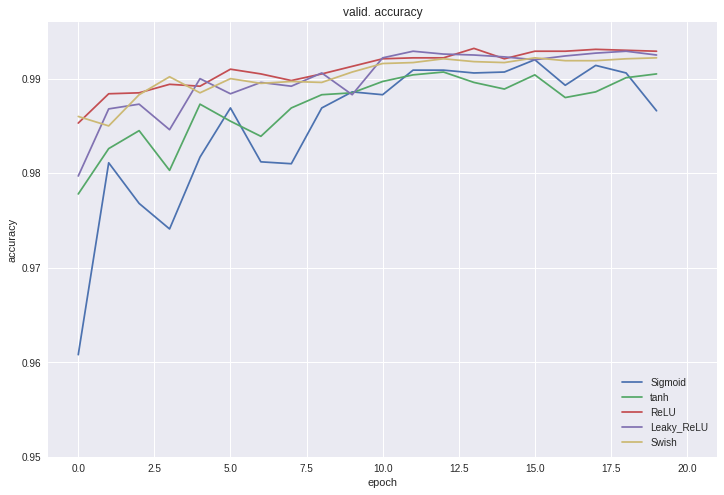

In [28]:
plot_history(hists, attribute='val_acc',axis=(-1,21,0.95,0.9960), loc='lower right')

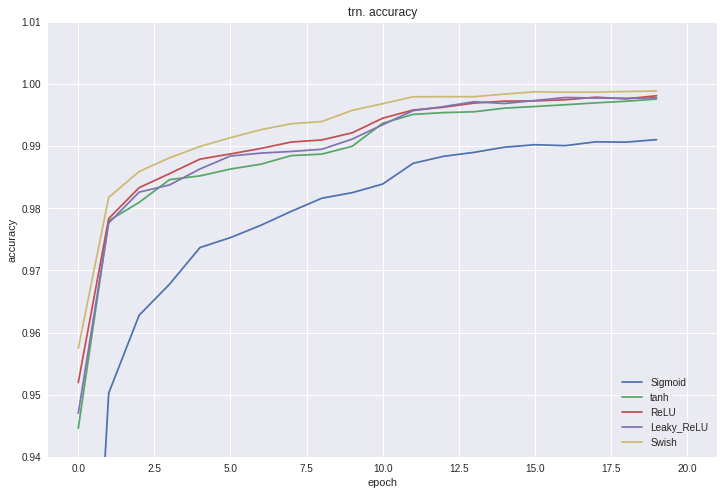

In [29]:
plot_history(hists, attribute='acc', axis=(-1,21,0.94,1.01), loc='lower right')

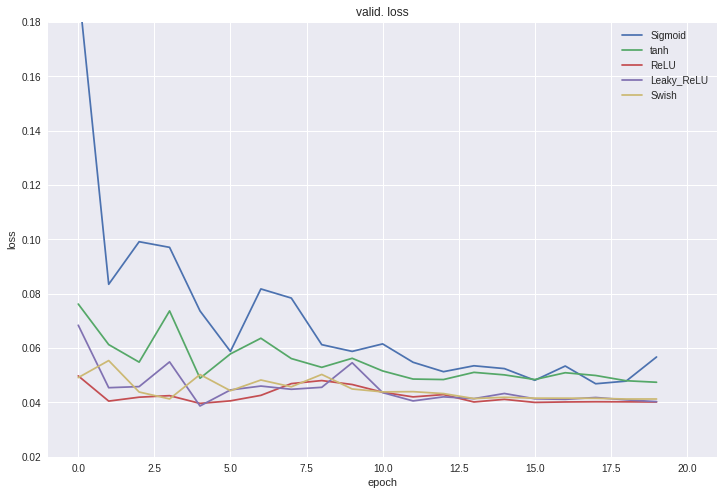

In [30]:
plot_history(hists, attribute='val_loss', axis=(-1,21,0.02,0.18), loc='upper right')

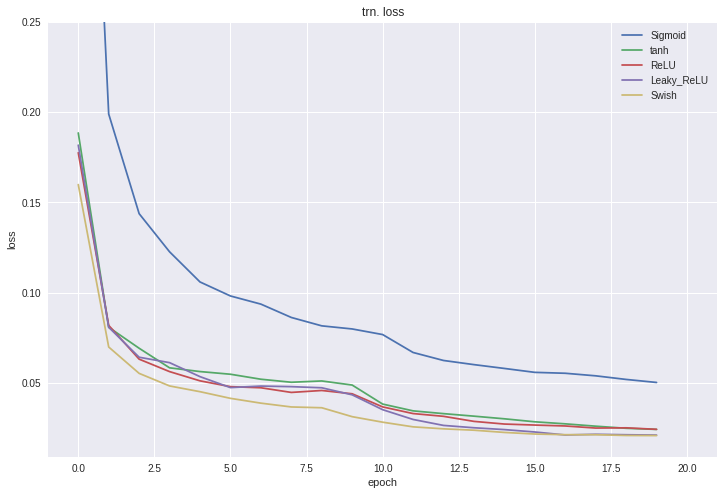

In [31]:
plot_history(hists, attribute='loss', axis=(-1,21,0.009,0.25), loc='upper right')